데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Linear_Regression

출처: Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821). John Wiley & Sons.<br>
데이터: http://bcs.wiley.com/he-bcs/Books?action=resource&bcsId=9068&itemId=0470542810&resourceId=36322

5장<br>
목차<br>
1. Multiple Linear Regression
2. Standadized Regression Coefficient
3. Simultaneous Confidence Interval

# 1. Transformation on y

<b>1) Empirical approach: Variance Stabilizing Transformations</b>

- constant variance assumption 만족 못할 때 사용<br>
$\sigma^{2} \propto$ constant => $y^{'}=y$ No transformation<br>
$\sigma^{2} \propto$ $E(y)$ => $y^{'}=\sqrt{y}$ square root; Poisson data<br>
$\sigma^{2} \propto$ $E(y)[1-E(y)]$ => $y^{'}=sin^{-1}(\sqrt{y})$ arcsin; binomial proportion<br>
$\sigma^{2} \propto$ $[E(y)]^{2}$ => $y^{'}=ln(y)$ log transformation<br>
$\sigma^{2} \propto$ $[E(y)]^{3}$ => $y^{'}=y^{1/2}$ Reciprocal square root<br>
$\sigma^{2} \propto$ $[E(y)]^{4}$ => $y^{'}=y^{-1}$ Reciprocal<br>

Non constnt error variance 문제가 생기면 Least square estimator가 unbiased여도 minimum variance가 아니게 됨<br>
따라서 coefficient 추정량의 분산 커짐 => 모델의 추정값이 부정확해지고 통계적 검정의 sensitivity 증가

In [4]:
setwd('C:/Users/bki19/desktop/Linear_Regression/data')

In [5]:
df<-read.csv('./Electric_Utility.csv')
df<-df[,c(2,3)]
colnames(df)<-c('x','y')

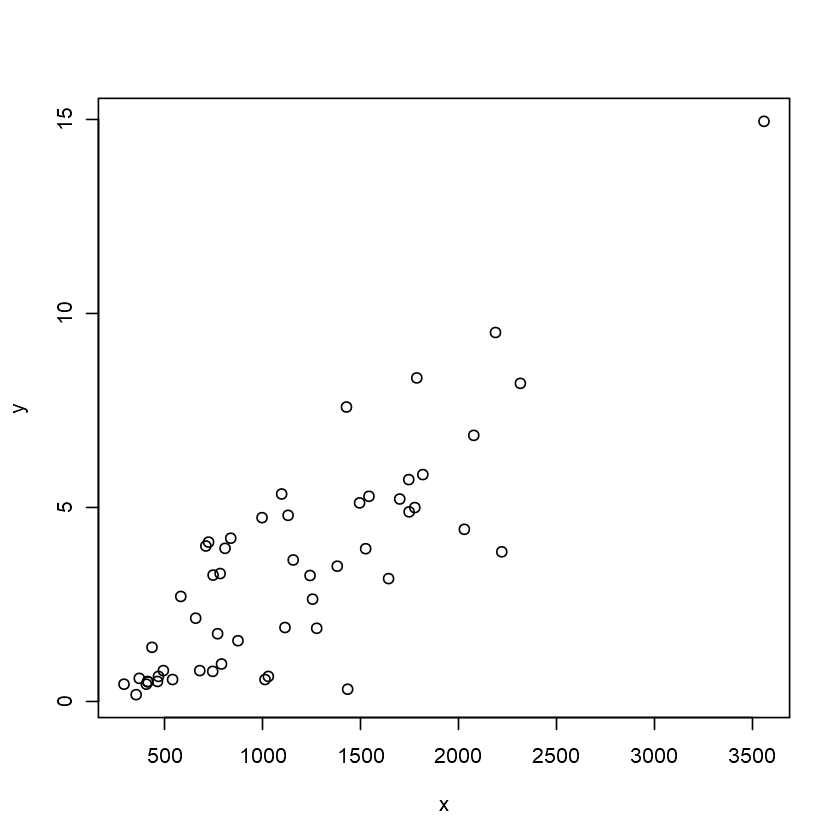

In [6]:
plot(df)

The Electric Utility Data<br>
<br>
53명의 거주자의 8월 달 전력 사용 데이터<br>
전력 사용량(X)과 피크 전력 시간(y)의 관계<br>
전력 계획을 세우기 위해 전력 사용량 데이터 분석

In [8]:
fit<-lm(y~x,data=df)

In [9]:
summary(fit)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1399 -0.8275 -0.1934  1.2376  3.1522 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.8313037  0.4416121  -1.882   0.0655 .  
x            0.0036828  0.0003339  11.030 4.11e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.577 on 51 degrees of freedom
Multiple R-squared:  0.7046,	Adjusted R-squared:  0.6988 
F-statistic: 121.7 on 1 and 51 DF,  p-value: 4.106e-15


$R^{2}=0.7046$: 약 70%의 변동성이 선형 fitting으로 설명 되고 있다<br>
Coefficient도 유의하여 모형에 아무런 문제가 없어 보임

In [10]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,302.6331,302.633136,121.6582,4.106229e-15
Residuals,51,126.8660,2.487569,NA,NA


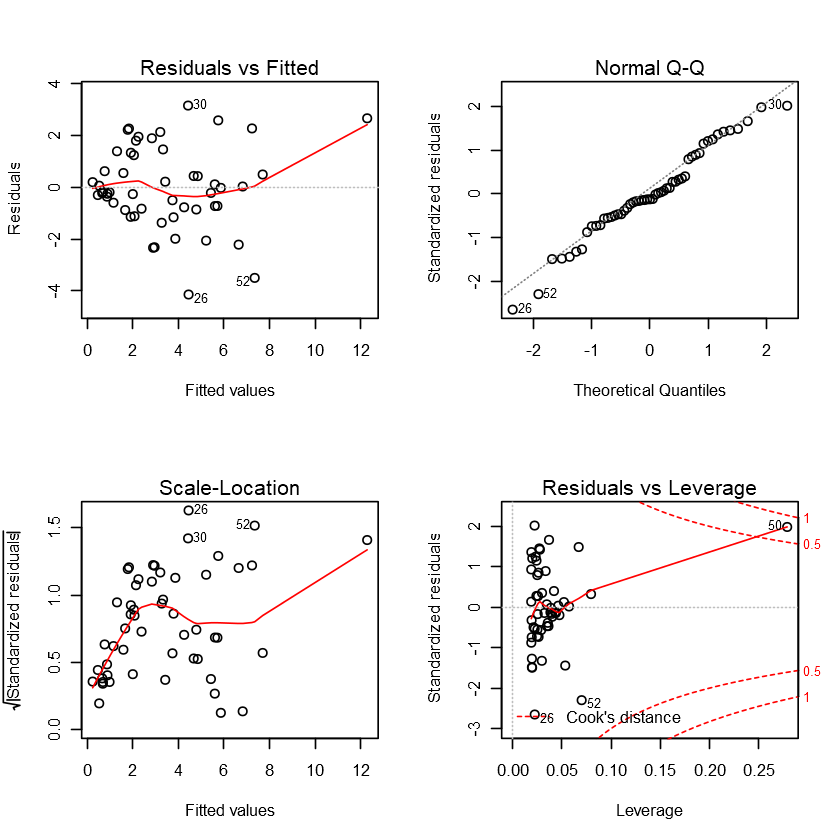

In [11]:
par(mfrow=c(2,2))
plot(fit)

Residual vs fited plot으로 보아 variance가 점차 증가함<br>
y는 전력 사용량이지만 횟수로 보고 poisson transformation $y'=\sqrt{y}$

In [12]:
fit2<-lm( (y)^0.5~x,data=df)

In [13]:
summary(fit2)


Call:
lm(formula = (y)^0.5 ~ x, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39185 -0.30576 -0.03875  0.25378  0.81027 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.822e-01  1.299e-01   4.481 4.22e-05 ***
x           9.529e-04  9.824e-05   9.699 3.61e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.464 on 51 degrees of freedom
Multiple R-squared:  0.6485,	Adjusted R-squared:  0.6416 
F-statistic: 94.08 on 1 and 51 DF,  p-value: 3.614e-13


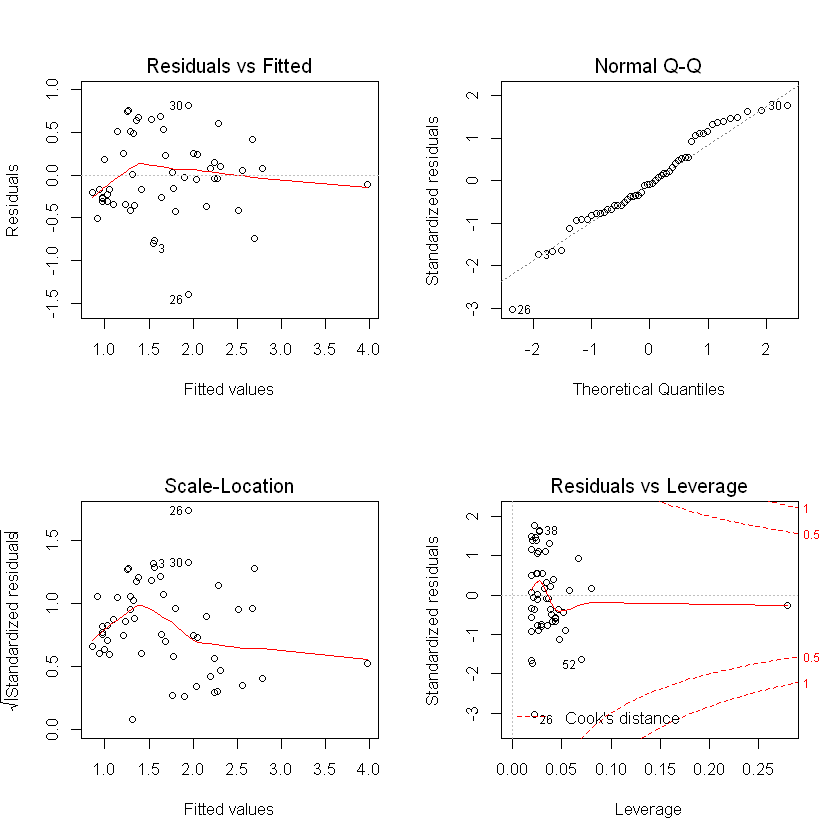

In [10]:
par(mfrow=c(2,2))
plot(fit2)

Residual vs Fitted plot 통해 variance stabilized 된 것 확인 가능<br>
여전한 문제는 26과 50번의 residual 꽤 높음이 높아 outlier의 가능성

<b>2) Analytical approach: Box Cox <br></b>

$y^{(\lambda)}=\frac{y^{\lambda}-1}{\lambda \dot{y}^{\lambda -1} }, \lambda \neq 0$<br>
$y^{(\lambda)}=\dot{y} lny, \lambda = 0$<br>
where $\dot{y}=ln^{-1}[\frac{1}{n}\sum_{i=1}^{n}lny_{i}  ]$

$\lambda 정하는 방법$<br>
$\lambda=1$이면 transformation 필요 없다는 뜻<br>
Maximum Likelihood: $L(\lambda)=-\frac{1}{2}n ln[SS_{Res}(\lambda)  ]$<=> minimize $SS_{Res}(\lambda)$<br>
Approximate CI for $\lambda$: $L(\hat{\lambda})-\frac{1}{2}\chi_{\alpha,1}^{2}$를 $L(\lambda)$에 수평으로 그었을 때 아래쪽 구간

In [14]:
library(MASS)

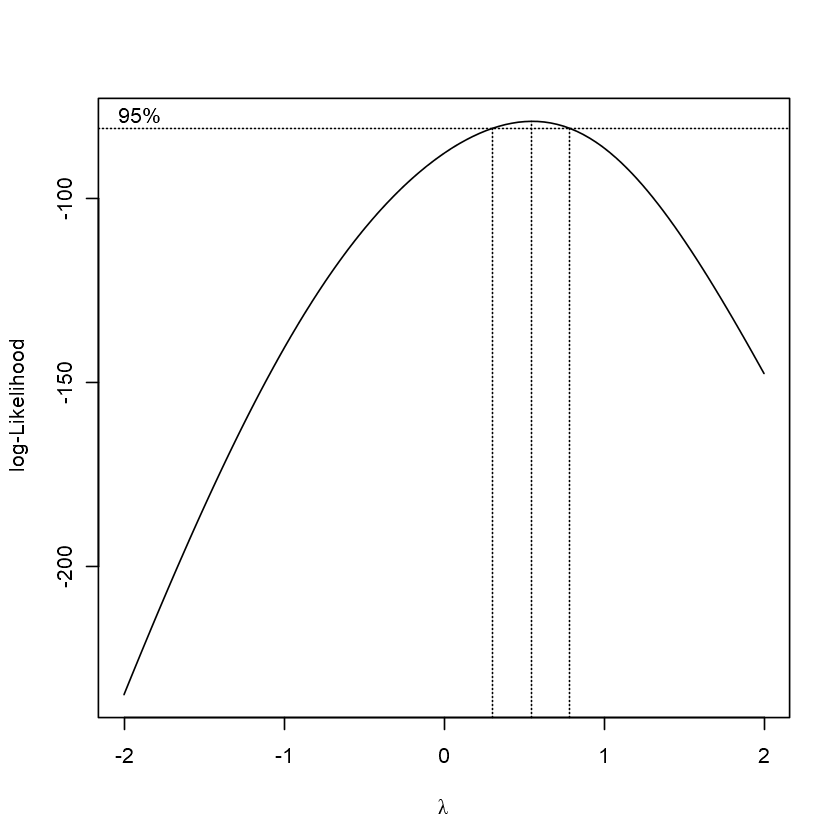

In [15]:
fit_box<-boxcox(y~x,data=df)

grid search로 SSres를 minimize하는 lambda 찾음

In [17]:
lambdas<-fit_box$x
loglik<-fit_box$y
cbind(lambdas,loglik)
lambdas[which.max(loglik)]

lambdas,loglik
-2.0000000,-234.6266
-1.9595960,-230.3175
-1.9191919,-226.0388
-1.8787879,-221.7920
-1.8383838,-217.5786
-1.7979798,-213.4002
-1.7575758,-209.2583
-1.7171717,-205.1546
-1.6767677,-201.0909
-1.6363636,-197.0689


[1] 0.5454545

maximized 하는 lambda는 0.5454이고 이것에 대한 CI가 1을 포함 안하기 떄문에 유의함<br>
앞선 root(y) transformation이랑 비슷한 결과 의미 있음

# 2. Transformation on X

- Y와 X의 linear relationship 가정 위반 했을 때

<b>1) Empirical approach</b>

In [18]:
df<-read.csv('./Windmill.csv')
colnames(df)<-c('Velocity','Output')

The Windmill Data<br>
풍속에 따라 전력 발전을 얼마나 하는지

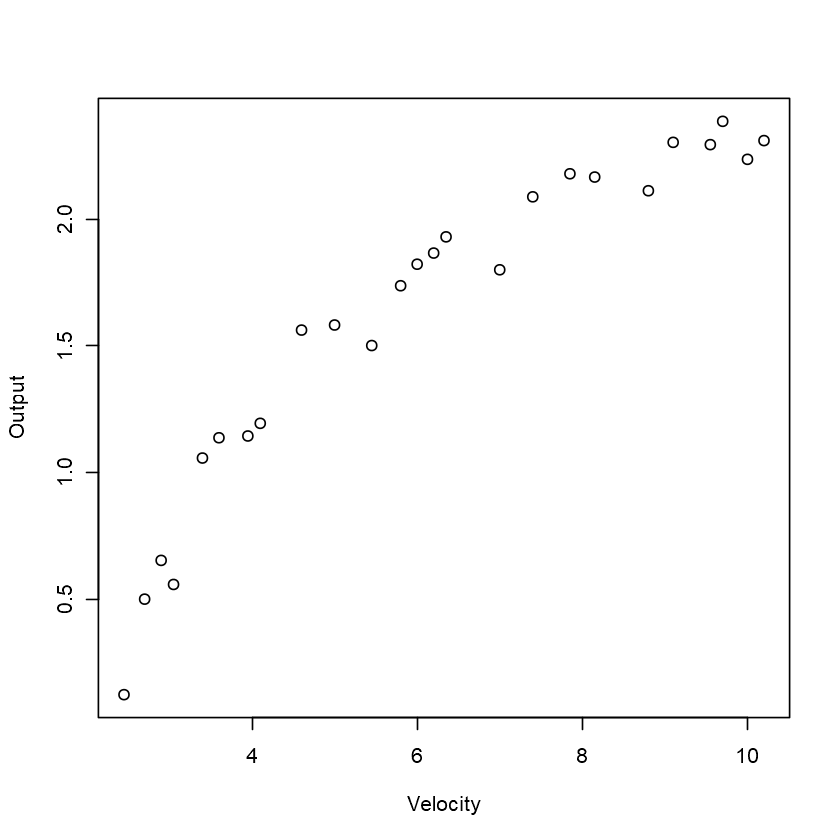

In [19]:
plot(df)

Plot 봤을 때 nonlinear 가능성

In [20]:
fit<-lm(Output~Velocity,data=df)
summary(fit)


Call:
lm(formula = Output ~ Velocity, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59869 -0.14099  0.06059  0.17262  0.32184 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.13088    0.12599   1.039     0.31    
Velocity     0.24115    0.01905  12.659 7.55e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2361 on 23 degrees of freedom
Multiple R-squared:  0.8745,	Adjusted R-squared:  0.869 
F-statistic: 160.3 on 1 and 23 DF,  p-value: 7.546e-12


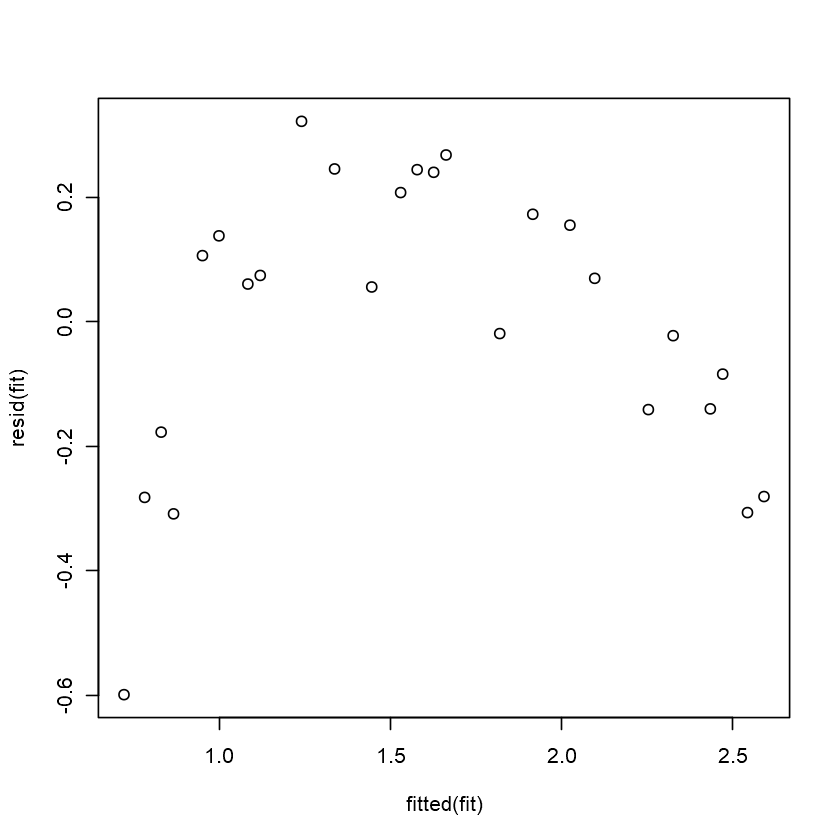

In [21]:
plot(fitted(fit),resid(fit))

residual plot 봤을 떄 활 모양으로 nonlinear<br>
quadratic term 추가 고려해야 됨<br>
하지만 풍속이 중가할 수록 전력 생산량이 증가하다가 감소한다는 산업적 지식에서 $\frac{1}{x}$ transformation

In [22]:
df2<-df
df2$Velocity<- (1/df$Velocity)
fit2<-lm(Output~ Velocity,data=df2)
summary(fit2)


Call:
lm(formula = Output ~ Velocity, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20547 -0.04940  0.01100  0.08352  0.12204 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9789     0.0449   66.34   <2e-16 ***
Velocity     -6.9345     0.2064  -33.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09417 on 23 degrees of freedom
Multiple R-squared:   0.98,	Adjusted R-squared:  0.9792 
F-statistic:  1128 on 1 and 23 DF,  p-value: < 2.2e-16


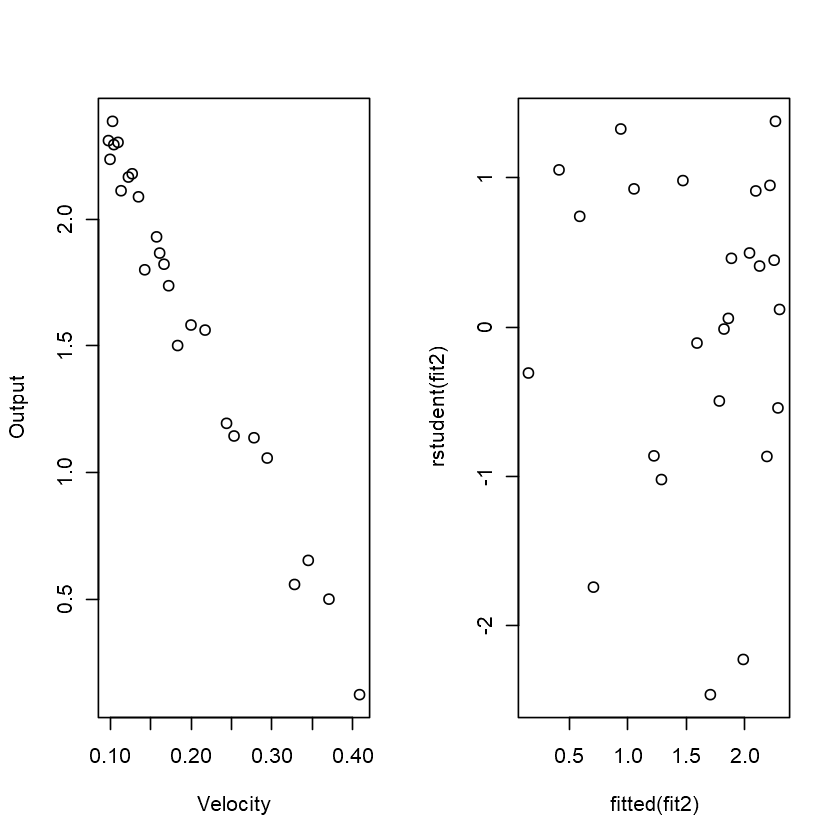

In [23]:
par(mfrow=c(1,2))
plot(df2)
plot(fitted(fit2),rstudent(fit2))

residual plot을 봤을 때 ienquality of varaince 문제 없어 보임<br>
따라서 transformed model이 적합

<b>2) Analytical approach: Box Tidwell Procedur <br></b>

처음에 transformation이 $\xi =x^{a}$라고 가정<br> 
예제에서는 $\alpha_{0}=1$<br>
$\hat{y}=\hat{\beta}_{0}+\hat{\beta}_{1}x  $ 추정<br>
$w=xlnx$로 설정<br>
$\hat{y}=\hat{\beta}_{0}^{*}+\hat{\beta}_{1}^{*}x+ \hat{\gamma} w  $ 추정<br>
$\alpha_{1}=\frac{ \hat{\gamma} }{\hat{\beta}_{1}}+1$ 계산



In [24]:
alpha=1
df3<-df
df3$w<- df$Velocity*log(df$Velocity)

In [25]:
fit3<-lm(Output~Velocity+w,data=df3)
summary(fit3)


Call:
lm(formula = Output ~ Velocity + w, data = df3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.223004 -0.029442  0.009955  0.048323  0.181553 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.41684    0.28512  -8.477 2.23e-08 ***
Velocity     1.53443    0.14189  10.814 2.85e-10 ***
w           -0.46260    0.05065  -9.132 6.13e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1103 on 22 degrees of freedom
Multiple R-squared:  0.9738,	Adjusted R-squared:  0.9714 
F-statistic: 408.9 on 2 and 22 DF,  p-value: < 2.2e-16


In [26]:
coef(fit3)

(Intercept)    Velocity           w 
 -2.4168438   1.5344349  -0.4625963

In [27]:
alpha1=alpha+coef(fit3)[3]/coef(fit)[2]
alpha1

w 
-0.9183019

$\alpha$가 -1로 가깝게 됨<br>
앞선 $\frac{1}{x}$ transformation와 비슷한 결과<br>